# CLUSTERED LINEAR REGRESSION

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
palette = ["#01153E","#ADD8E6","#136F63","#F72585","#FFBA08"]

In [6]:
#dataset loaded
admit = pd.read_csv(r"d:\Users\Admin\Downloads\Admission_Predict_Ver1.1.csv")

In [7]:
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [89]:
#dataset imformation
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
admit.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
admit.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
admit.drop('Serial No.', inplace = True, axis=1)

In [12]:
#features visulaization
cols = admit.columns
cols

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

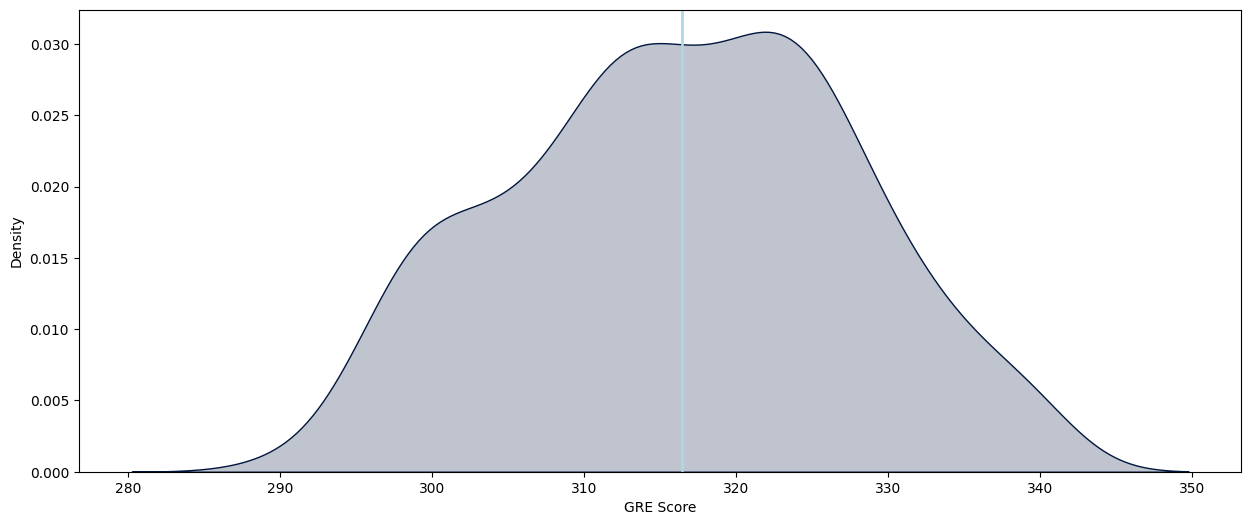

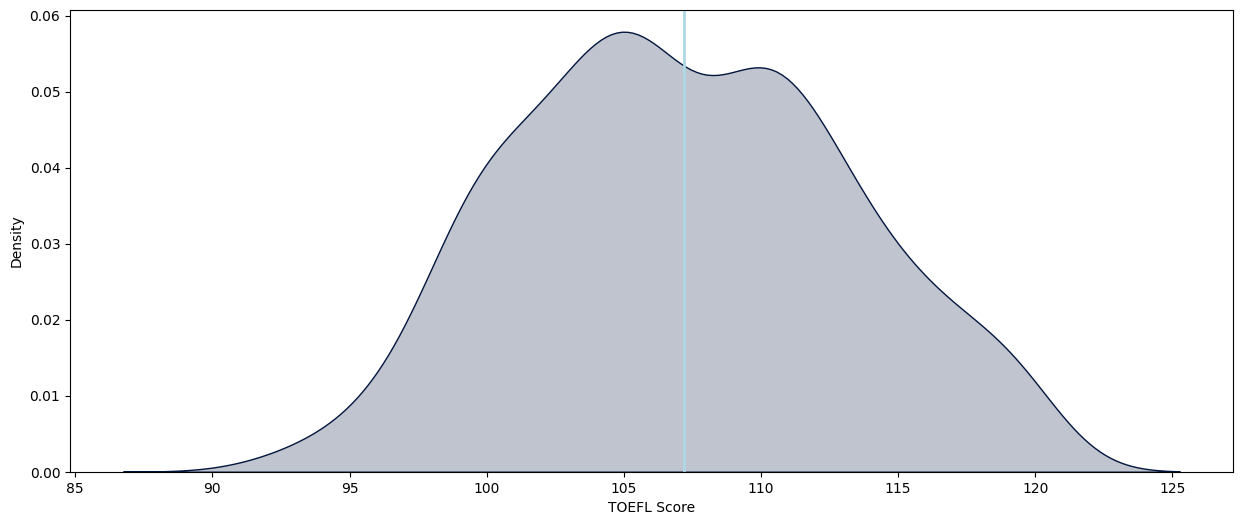

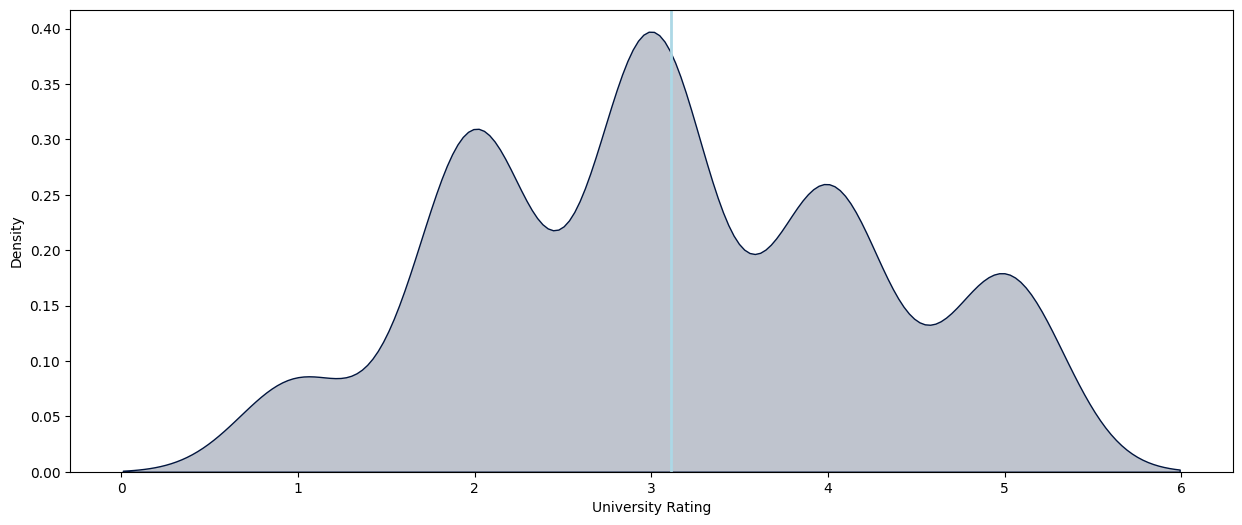

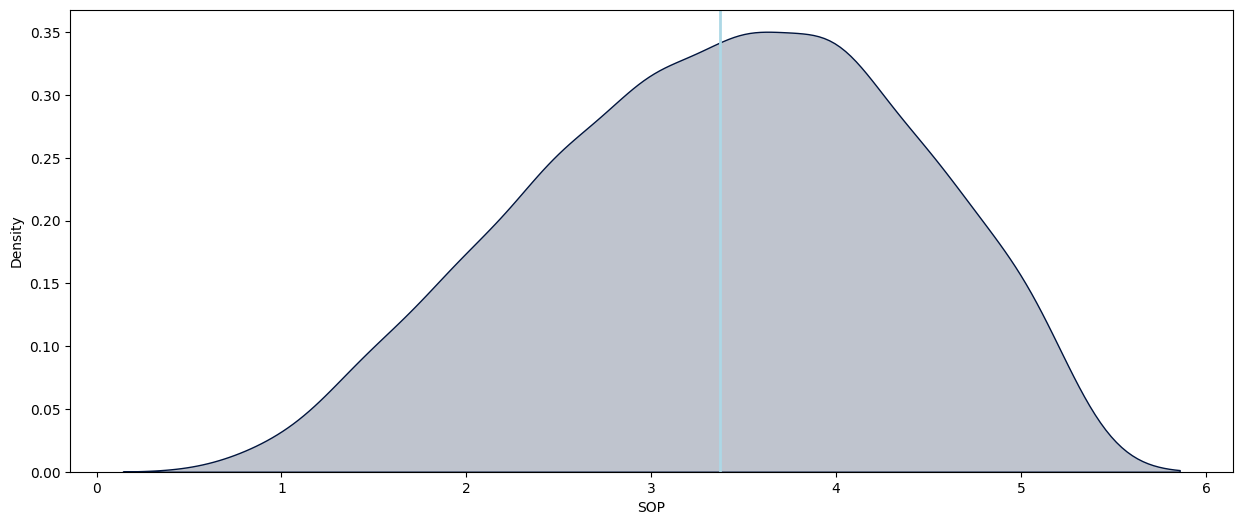

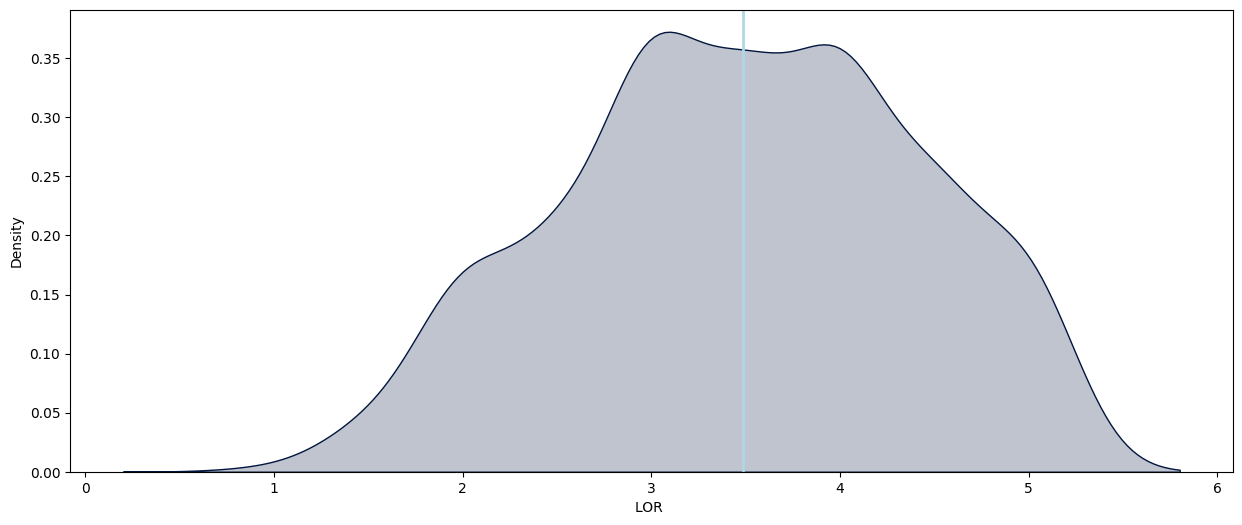

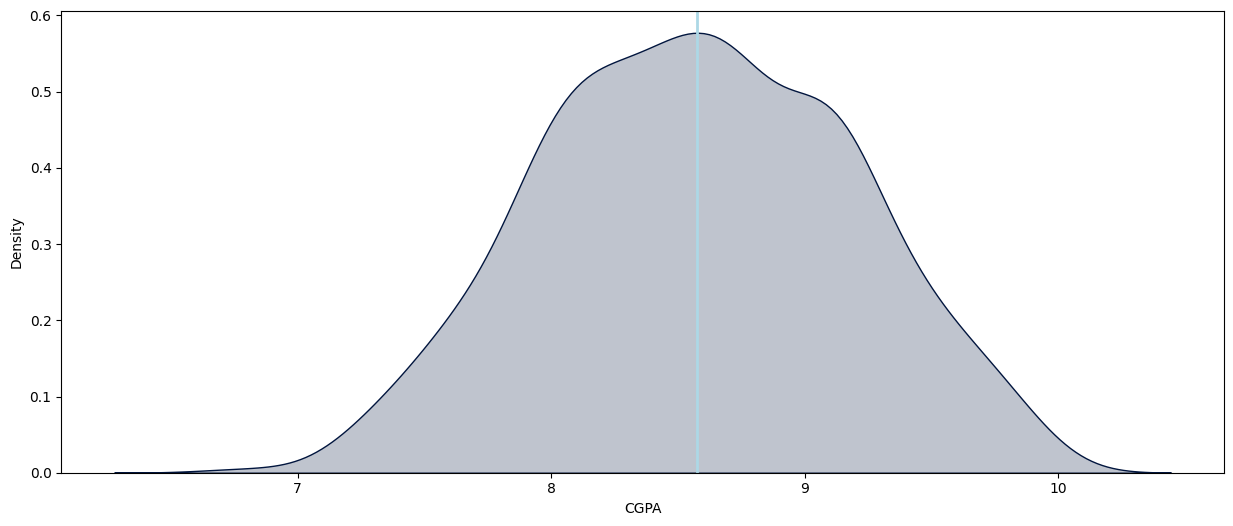

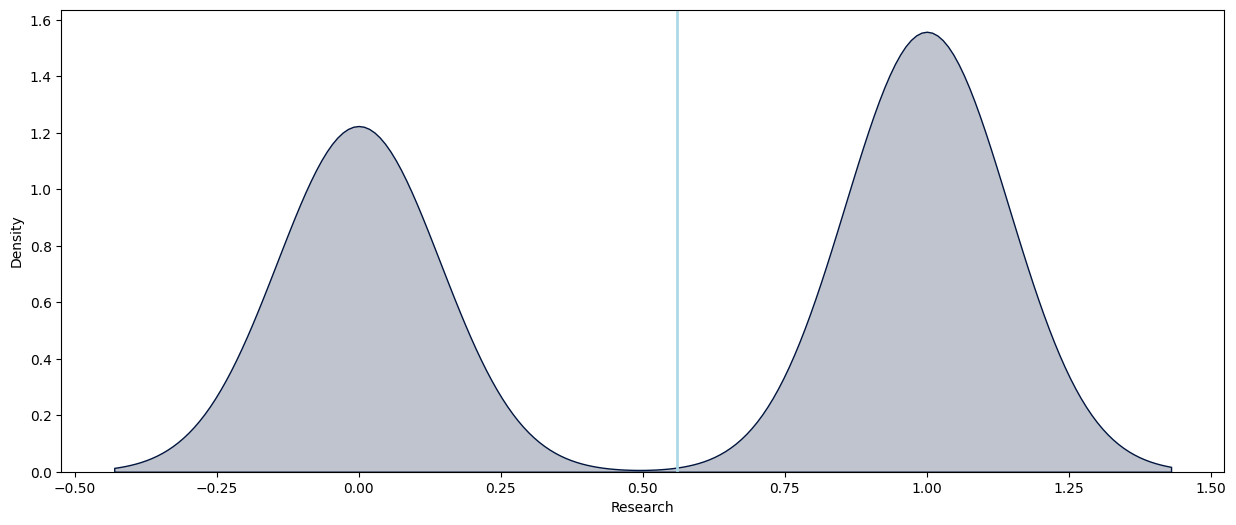

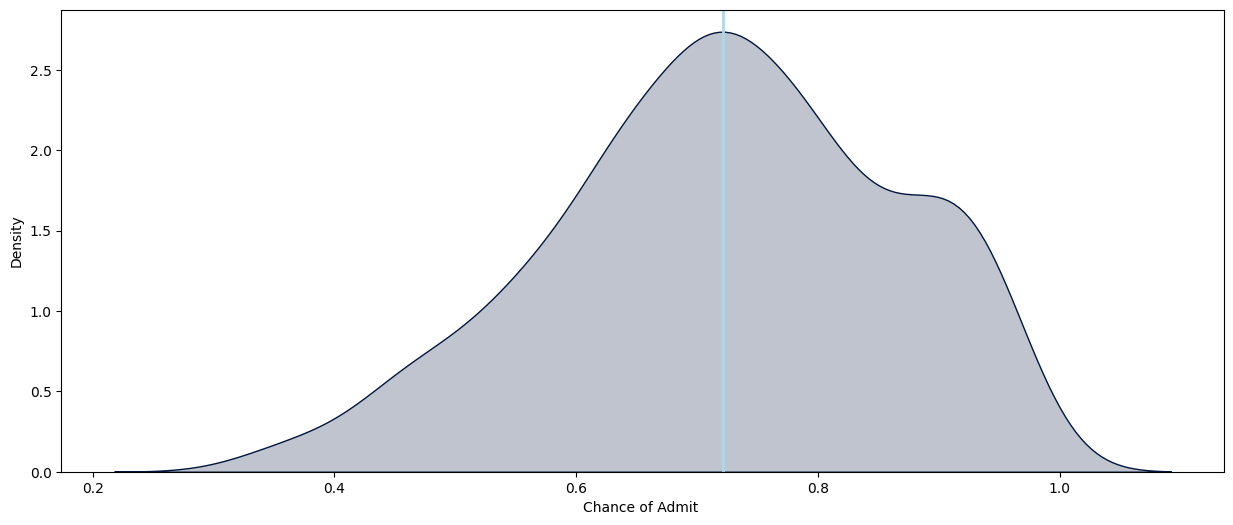

In [13]:
for n in cols :
  fig, ax = plt.subplots(1, 1, figsize=(15, 6))
  sns.kdeplot(admit[n], color=palette[0], ax=ax, fill = True)
  ax.axvline(admit[n].mean(), color=palette[1], linewidth=2)

  plt.show()

In [14]:
from scipy.stats import skew

skew_data = pd.DataFrame(data = cols, columns=['Features'])
skewness = []
for n in cols :
  skewness.append(skew(admit[n]))

skew_data['Skewness'] = skewness
skew_data

,Features,Skewness
0,GRE Score,-0.039722
1,TOEFL Score,0.095314
2,University Rating,0.090024
3,SOP,-0.228285
4,LOR,-0.144854
5,CGPA,-0.026533
6,Research,-0.241747
7,Chance of Admit,-0.289096


In [15]:
ur = admit['University Rating'].value_counts()
ur

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

In [16]:
sop = admit['SOP'].value_counts()
sop

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64

In [17]:
research = admit['Research'].value_counts()
research

Research
1    280
0    220
Name: count, dtype: int64

In [18]:
lor = admit['LOR '].value_counts()
lor

LOR 
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64

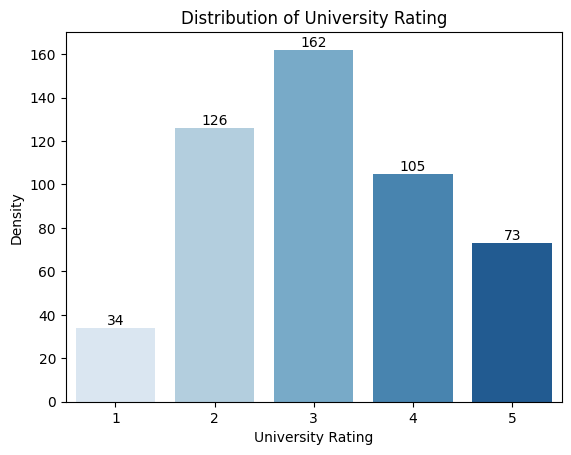

In [19]:
ax = sns.barplot(x= ur.index , y= ur.tolist(), data=admit, palette= 'Blues')
ax.bar_label(ax.containers[0])

plt.xlabel("University Rating")
plt.ylabel("Density")
plt.title("Distribution of University Rating")

plt.show()

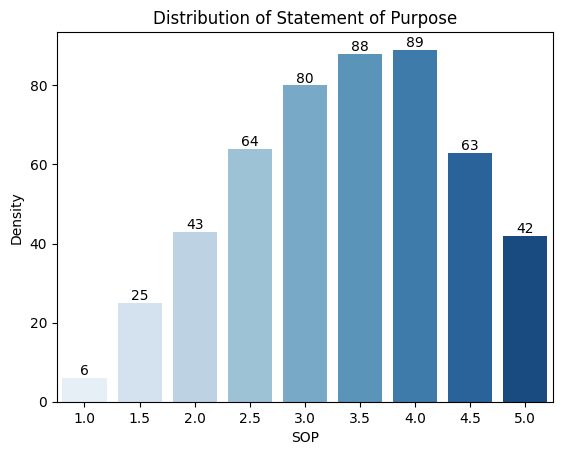

In [20]:
ax = sns.barplot(x= sop.index , y= sop.tolist(), data=admit, palette= 'Blues')
ax.bar_label(ax.containers[0])

plt.xlabel("SOP")
plt.ylabel("Density")
plt.title("Distribution of Statement of Purpose")

plt.show()

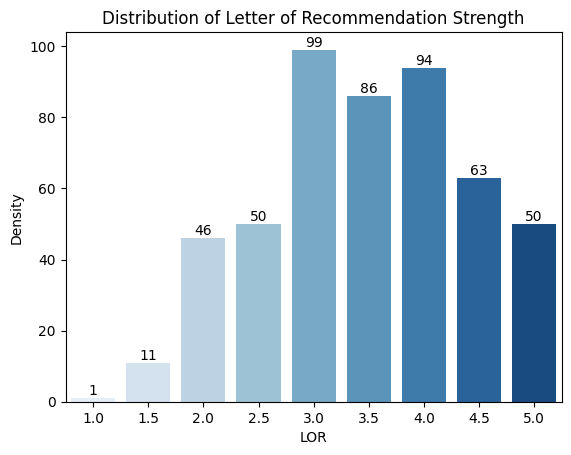

In [21]:
ax = sns.barplot(x= lor.index , y= lor.tolist(), data=admit, palette= 'Blues')
ax.bar_label(ax.containers[0])

plt.xlabel("LOR")
plt.ylabel("Density")
plt.title("Distribution of Letter of Recommendation Strength")

plt.show()

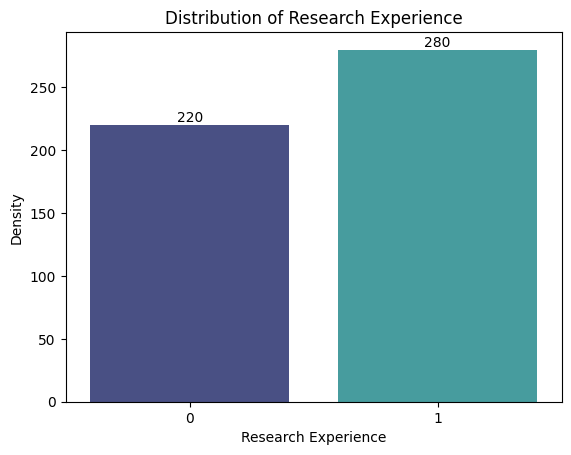

In [22]:
ax = sns.barplot(x= research.index , y= research.tolist(), data=admit, palette= 'mako')
ax.bar_label(ax.containers[0])

plt.xlabel("Research Experience")
plt.ylabel("Density")
plt.title("Distribution of Research Experience")

plt.show()

In [23]:
#corelation of features
corr = admit.corr()

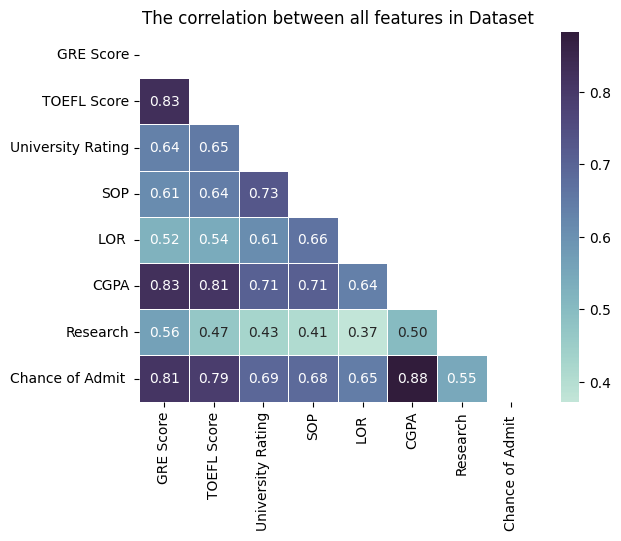

In [24]:
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, annot=True,linewidths=.5, fmt=".2f", cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), mask=dropSelf)

plt.title("The correlation between all features in Dataset")
plt.show()

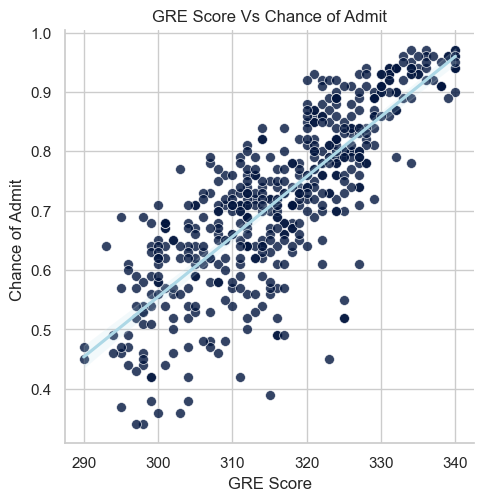

In [25]:
#GRE AND CHANCE TO ADMIT
sns.set(style="whitegrid", color_codes=True)

sns.lmplot(x='GRE Score', y='Chance of Admit ', data= admit,
          scatter_kws={'s': 50, 'linewidth': 0.5, 'color' : palette[0], 'edgecolor': 'w'},
          line_kws = {'color' : palette[1]})

plt.title("GRE Score Vs Chance of Admit")
plt.show()

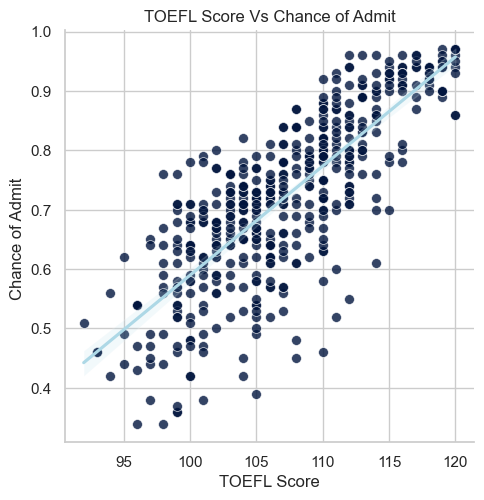

In [26]:
#TOFEL VS CHANCE TO ADMIT
sns.set(style="whitegrid", color_codes=True)

sns.lmplot(x='TOEFL Score', y='Chance of Admit ', data= admit,
          scatter_kws={'s': 50, 'linewidth': 0.5, 'color' : palette[0], 'edgecolor': 'w'},
          line_kws = {'color' : palette[1]})

plt.title("TOEFL Score Vs Chance of Admit")
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


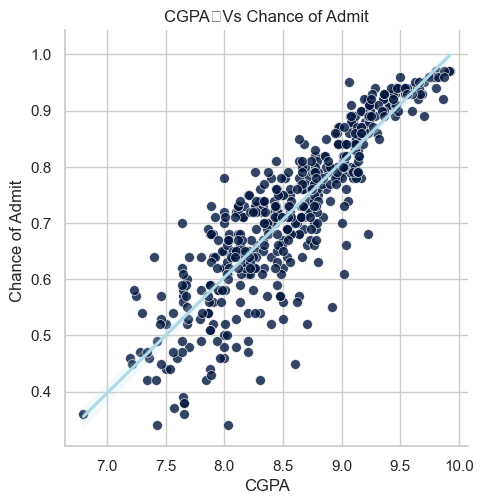

In [90]:
#CGPA VS CHANCE TO ADMIT
sns.set(style="whitegrid", color_codes=True)

sns.lmplot(x='CGPA', y='Chance of Admit ', data= admit,
          scatter_kws={'s': 50, 'linewidth': 0.5, 'color' : palette[0], 'edgecolor': 'w'},
          line_kws = {'color' : palette[1]})

plt.title("CGPA	Vs Chance of Admit")
plt.show()

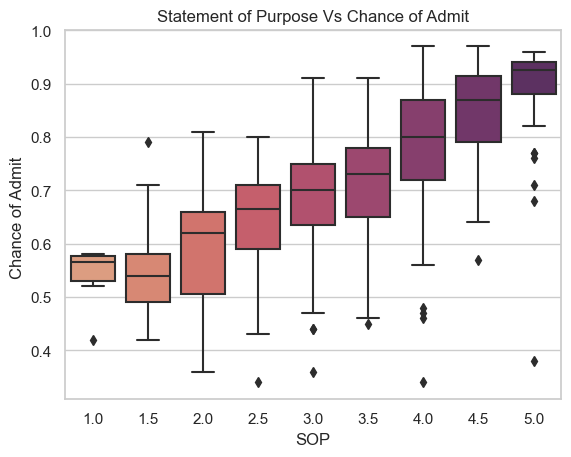

In [92]:
#SOP VS CHANCE TO ADMIT
sns.boxplot(x= 'SOP', y='Chance of Admit ', data= admit, palette = 'flare')

plt.title("Statement of Purpose Vs Chance of Admit")
plt.show()

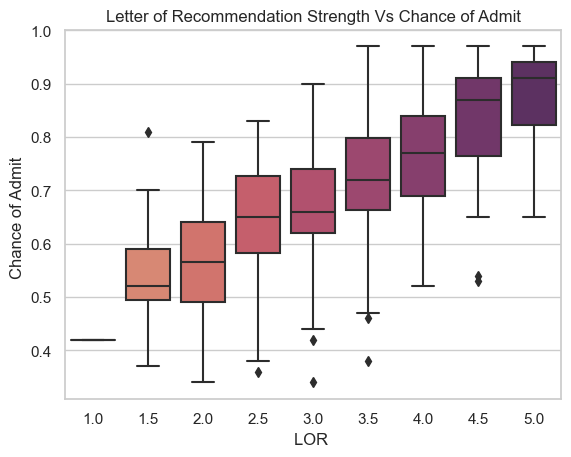

In [30]:
#LOR VS CHANCE TO ADMIT
sns.boxplot(x= 'LOR ', y='Chance of Admit ', data= admit, palette = 'flare')

plt.title("Letter of Recommendation Strength Vs Chance of Admit")
plt.show()

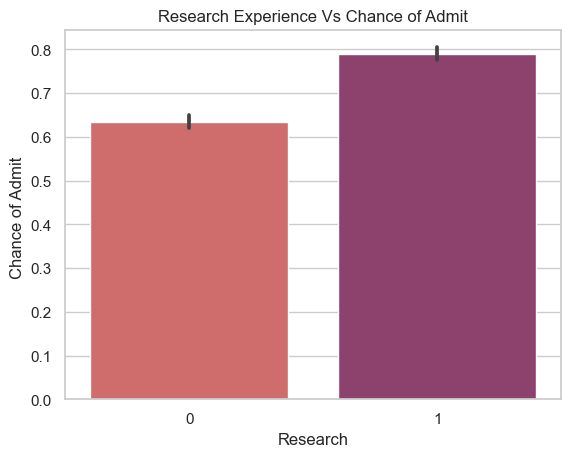

In [93]:
#RESEARCH EXPERIENCE VS CHANCE TO ADMIT
sns.barplot(x= 'Research', y= 'Chance of Admit ', data= admit, estimator=np.mean, palette ='flare')

plt.title("Research Experience Vs Chance of Admit")
plt.show()

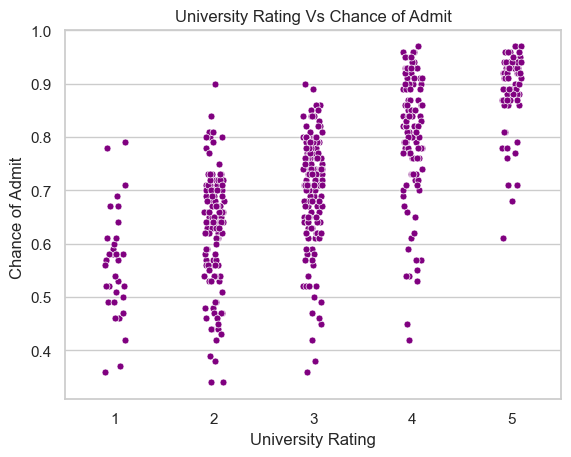

In [32]:
#UNIVERSITY RATING VS CHANCE TO ADMIT
sns.stripplot(x= 'University Rating', y='Chance of Admit ', data= admit, jitter=True, dodge= True,
              color ='purple', edgecolor= 'white', linewidth= 0.5 )

plt.title("University Rating Vs Chance of Admit")
plt.show()

In [33]:
#FEATURES OF DATAFRAMES
admit.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [34]:
features = admit[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']]

In [36]:
vif = pd.DataFrame()


In [37]:
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

In [38]:
vif["Features"] = features.columns

In [39]:
vif

,VIF,Features
0,1504.894810,GRE Score
1,1243.502370,TOEFL Score
2,21.590945,University Rating
3,35.444504,SOP
4,31.733871,LOR
5,1238.095755,CGPA
6,3.251300,Research
7,117.117817,Chance of Admit


In [40]:
#DECISION TO CHANCE TO ADMIT
X = admit.drop(['Chance of Admit '], axis=1)
y = admit['Chance of Admit ']

In [41]:
from sklearn.preprocessing import StandardScaler


In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit(X)

StandardScaler()

In [44]:
inputs_scaled = scaler.transform(X)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=365)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [49]:
models = [['Linear Regression :', LinearRegression()],
          ['DecisionTree :',DecisionTreeRegressor()],
          ['RandomForest :',RandomForestRegressor()],
          ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)]]

In [50]:
model = models[0][1]
name =  models[0][0]

In [51]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Linear Regression : 0.0619976544785769


Text(0, 0.5, 'Predictions ')

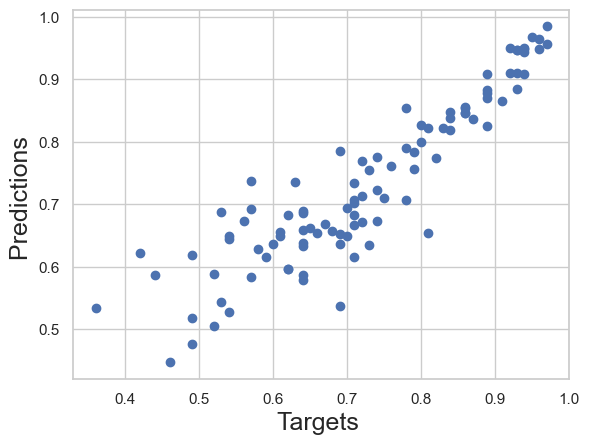

In [58]:
plt.scatter(y_test, predictions)
plt.xlabel('Targets ',size=18)
plt.ylabel('Predictions ',size=18)

In [59]:
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

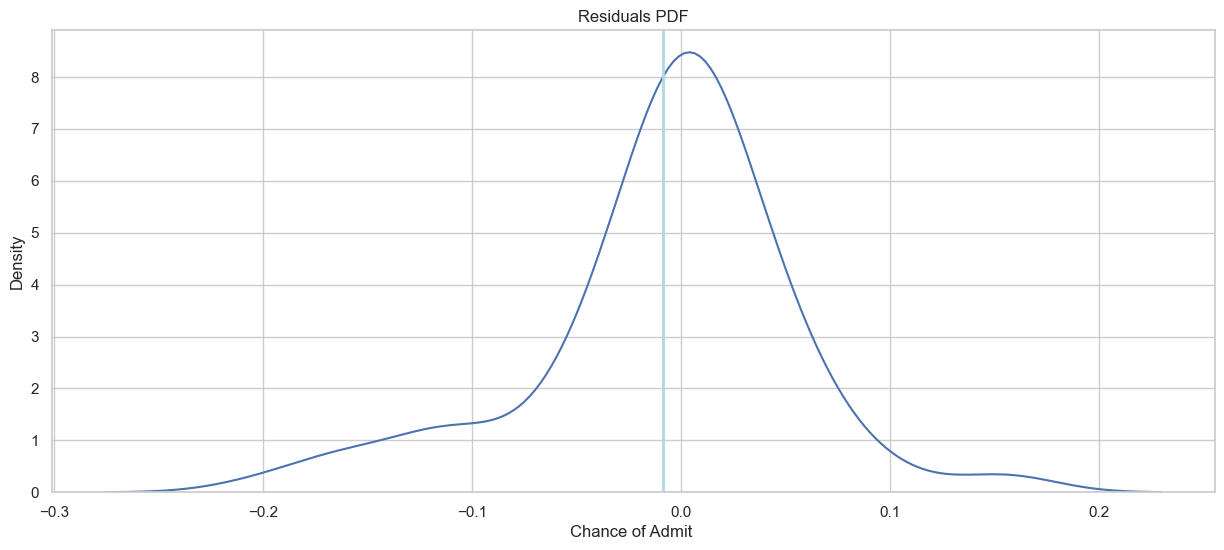

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(y_test - predictions)
ax.axvline((y_test - predictions).mean(), color=palette[1], linewidth=2)
plt.title("Residuals PDF")


In [60]:
model.score(X_test,y_test)



0.8238207767485871

In [61]:
df_reg = pd.DataFrame(predictions, columns=['Prediction'])
df_reg['Target'] = y_test
y_test = y_test.reset_index(drop=True)
df_reg['Target'] = y_test
df_reg['Residual'] = df_reg['Target'] - df_reg['Prediction']
df_reg['Difference%'] = np.absolute(df_reg['Residual']/df_reg['Target']*100)


In [62]:
pd.options.display.max_rows = 999

In [63]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [64]:
df_reg.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
14,0.80,0.80,0.00,0.11
99,0.64,0.64,0.00,0.18
6,0.67,0.67,0.00,0.22
54,0.76,0.76,-0.00,0.23
88,0.84,0.84,0.00,0.28
16,0.96,0.96,-0.00,0.37
18,0.94,0.94,-0.00,0.43
49,0.71,0.71,0.00,0.43
64,0.85,0.86,0.01,0.59
36,0.85,0.86,0.01,0.61


In [65]:
model = models[1][1]
name =  models[1][0]

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


DecisionTree : 0.09828021163998375


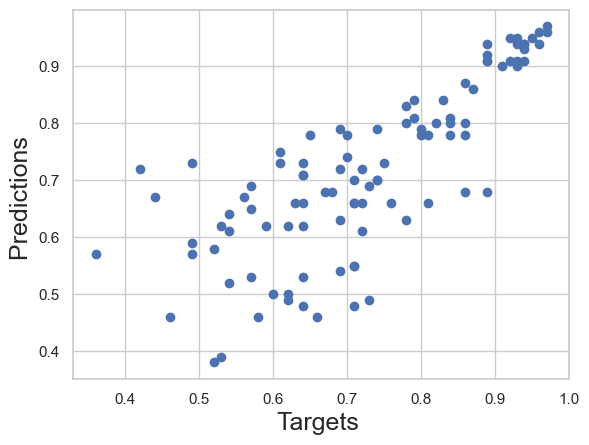

In [68]:
plt.scatter(y_test, predictions)
plt.xlabel('Targets ',size=18)
plt.ylabel('Predictions ',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

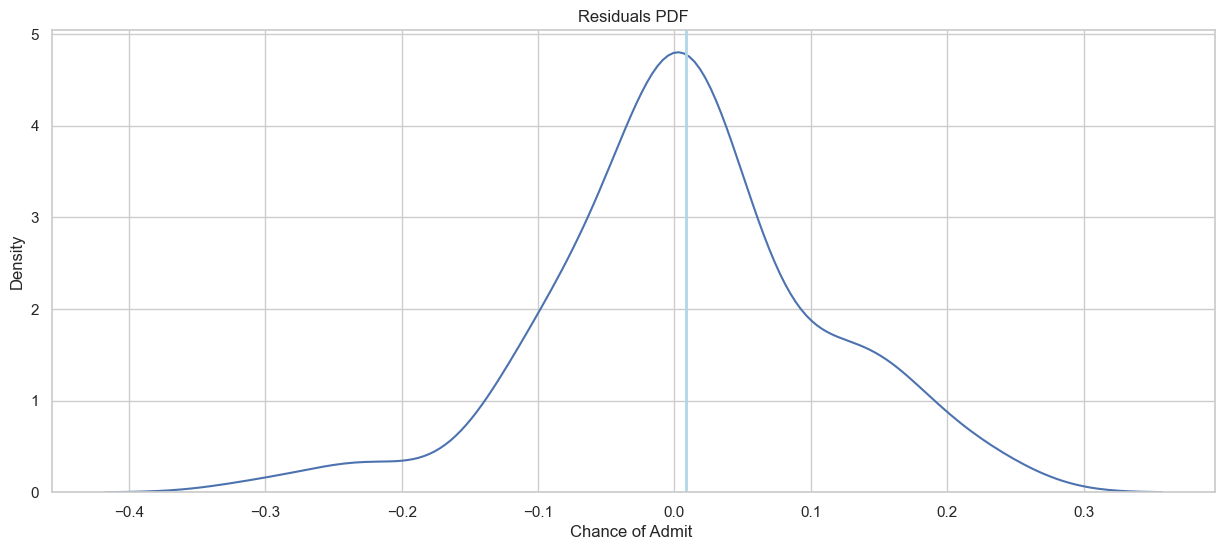

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(y_test - predictions)
ax.axvline((y_test - predictions).mean(), color=palette[1], linewidth=2)
plt.title("Residuals PDF")



In [71]:
model.score(X_test,y_test)


0.5572726639360797

RandomForest : 0.06350562179838878


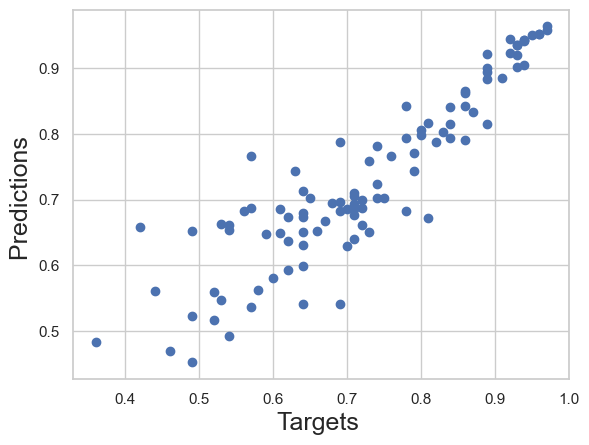

In [73]:
model = models[2][1]
name =  models[2][0]

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
plt.scatter(y_test, predictions)
plt.xlabel('Targets ',size=18)
plt.ylabel('Predictions ',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

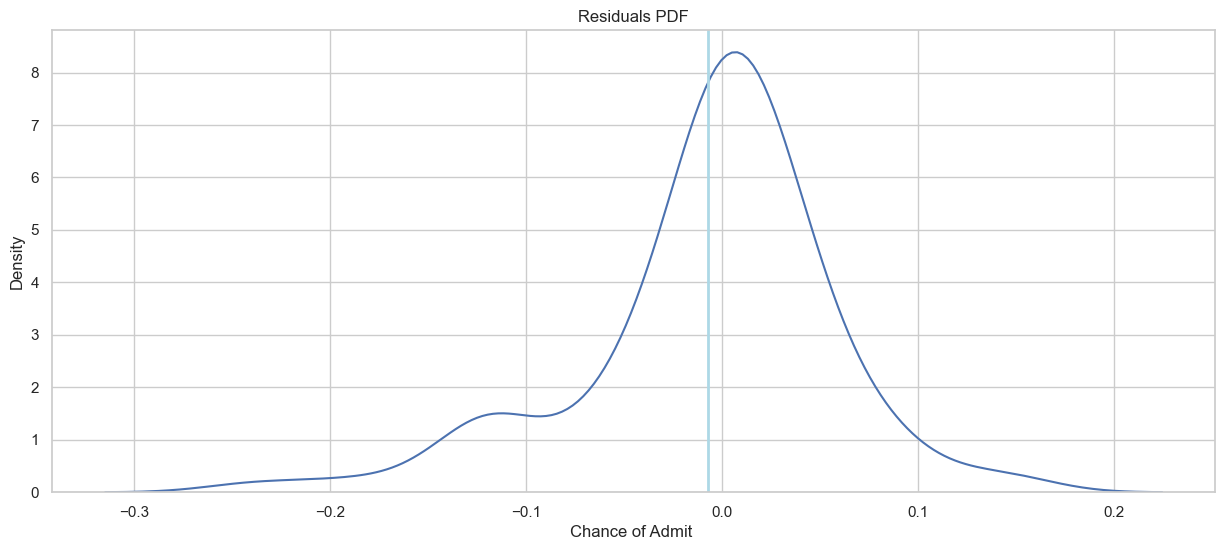

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(y_test - predictions)
ax.axvline((y_test - predictions).mean(), color=palette[1], linewidth=2)
plt.title("Residuals PDF")



In [76]:
model.score(X_test,y_test)


0.8151461426481323

In [77]:
model = models[3][1]
name =  models[3][0]

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


KNeighbours : 0.07362574278063344


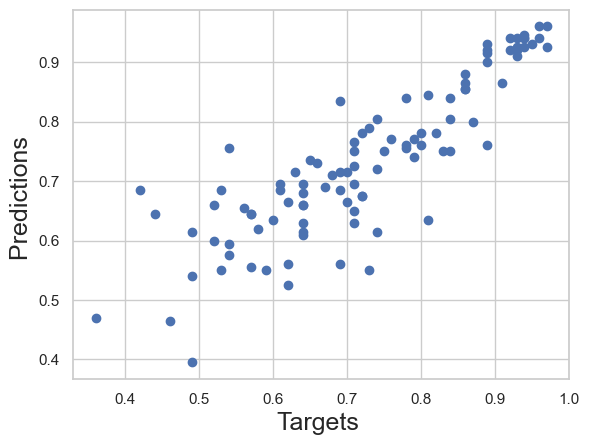

In [80]:
plt.scatter(y_test, predictions)
plt.xlabel('Targets ',size=18)
plt.ylabel('Predictions ',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

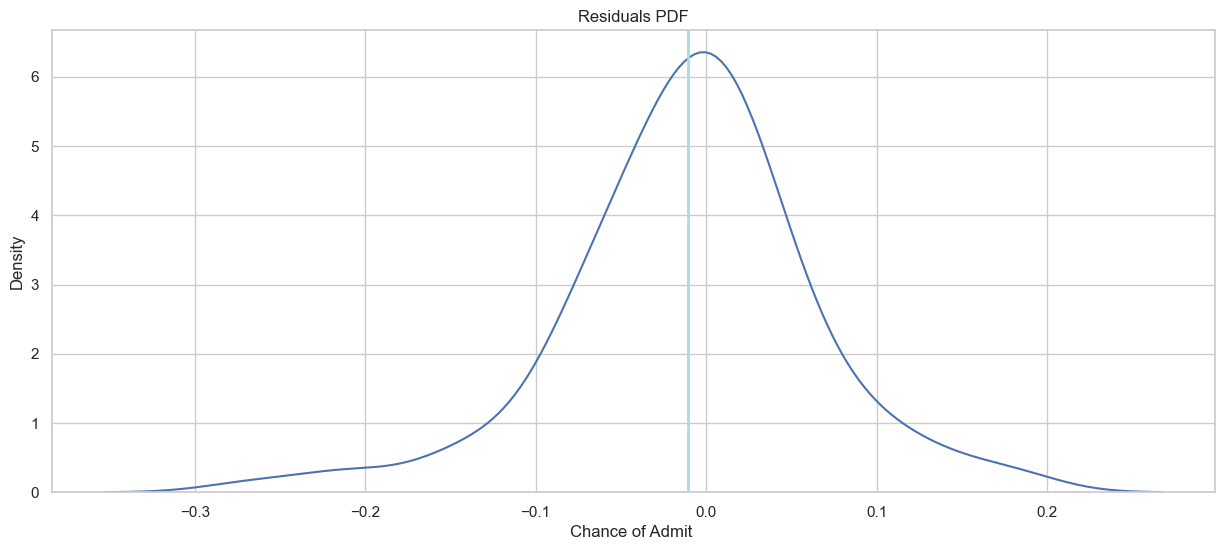

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(y_test - predictions)
ax.axvline((y_test - predictions).mean(), color=palette[1], linewidth=2)
plt.title("Residuals PDF")


In [84]:
model.score(X_test,y_test)



0.7515359553816652

# Data set has been trained according to clustering technique